In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.listdir(".")

['.ipynb_checkpoints', 'sonar .ipynb', 'sonar.csv']

In [3]:
sonar_df = pd.read_csv("sonar.csv",header=None)
sonar_df = sonar_df.sample(frac=1)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068,R
124,0.0388,0.0324,0.0688,0.0898,0.1267,0.1515,0.2134,0.2613,0.2832,0.2718,...,0.0255,0.0071,0.0263,0.0079,0.0111,0.0107,0.0068,0.0097,0.0067,M
12,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
120,0.0346,0.0509,0.0079,0.0243,0.0432,0.0735,0.0938,0.1134,0.1228,0.1508,...,0.0040,0.0122,0.0107,0.0112,0.0102,0.0052,0.0024,0.0079,0.0031,M
95,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,R


In [4]:
#label = sonar_df[sonar_df.columns[len(sonar_df.columns)-1]]
label = sonar_df.iloc[:,-1:]
label

,60
67,R
124,M
12,R
120,M
95,R
...,...
69,R
164,M
121,M
119,M


In [5]:
# converting column to flatten array
label = np.ravel(label)
print(label)

['R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R'
 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'R'
 'M' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R'
 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M'
 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R'
 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M'
 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'R'
 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M'
 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'M'
 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M'
 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M'
 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'R']


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#le.fit_transform(label,label)
label = le.fit_transform(label)

In [7]:
print(type(label))
print(label)

<class 'numpy.ndarray'>
[1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1]


In [8]:
label = label.astype('float')
print(label)
print(type(label))

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.]
<class 'numpy.ndarray'>


In [9]:
variety = sonar_df.iloc[:, :-1]
variety

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068
124,0.0388,0.0324,0.0688,0.0898,0.1267,0.1515,0.2134,0.2613,0.2832,0.2718,...,0.0152,0.0255,0.0071,0.0263,0.0079,0.0111,0.0107,0.0068,0.0097,0.0067
12,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0174,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032
120,0.0346,0.0509,0.0079,0.0243,0.0432,0.0735,0.0938,0.1134,0.1228,0.1508,...,0.0146,0.0040,0.0122,0.0107,0.0112,0.0102,0.0052,0.0024,0.0079,0.0031
95,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0000,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.0216,0.0215,0.0273,0.0139,0.0357,0.0785,0.0906,0.0908,0.1151,0.0973,...,0.0082,0.0140,0.0044,0.0052,0.0073,0.0021,0.0047,0.0024,0.0009,0.0017
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033
121,0.0162,0.0041,0.0239,0.0441,0.0630,0.0921,0.1368,0.1078,0.1552,0.1779,...,0.0128,0.0173,0.0135,0.0114,0.0062,0.0157,0.0088,0.0036,0.0053,0.0030
119,0.0261,0.0266,0.0223,0.0749,0.1364,0.1513,0.1316,0.1654,0.1864,0.2013,...,0.0135,0.0222,0.0175,0.0127,0.0022,0.0124,0.0054,0.0021,0.0028,0.0023


In [10]:
print(type(variety))
variety = variety.values
print(type(variety))
print(variety)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[0.0368 0.0403 0.0317 ... 0.0067 0.0078 0.0068]
 [0.0388 0.0324 0.0688 ... 0.0068 0.0097 0.0067]
 [0.0079 0.0086 0.0055 ... 0.0058 0.0059 0.0032]
 ...
 [0.0162 0.0041 0.0239 ... 0.0036 0.0053 0.003 ]
 [0.0261 0.0266 0.0223 ... 0.0021 0.0028 0.0023]
 [0.01   0.0171 0.0623 ... 0.0044 0.004  0.0117]]


In [11]:
print(variety.shape)
print(label.shape)

(208, 60)
(208,)


In [12]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)
# 
#x_train, x_val, y_train, y_val = train_test_split(variety, label, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)

In [13]:
print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)
print("validation :",x_val.shape)
print("validation label :",y_val.shape)

train : (145, 60)
train label : (145,)
test : (42, 60)
test label: (42,)
validation : (21, 60)
validation label : (21,)


# training on (training & Validation)

In [14]:
def training_Validation(batch_size,epochs,drop_ratio):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation="relu"),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

batch_size : 128 
 epochs : 70 
 drop_ratio : 0.002
Train on 145 samples, validate on 21 samples
Epoch 1/70
145/145 [==============================] - 1s 8ms/sample - loss: 0.7000 - accuracy: 0.5724 - val_loss: 0.6734 - val_accuracy: 0.7619
Epoch 2/70
145/145 [==============================] - 0s 269us/sample - loss: 0.6834 - accuracy: 0.6207 - val_loss: 0.6706 - val_accuracy: 0.7619
Epoch 3/70
145/145 [==============================] - 0s 393us/sample - loss: 0.6766 - accuracy: 0.6897 - val_loss: 0.6671 - val_accuracy: 0.6667
Epoch 4/70
145/145 [==============================] - 0s 365us/sample - loss: 0.6737 - accuracy: 0.6759 - val_loss: 0.6634 - val_accuracy: 0.6667
Epoch 5/70
145/145 [==============================] - 0s 331us/sample - loss: 0.6709 - accuracy: 0.6552 - val_loss: 0.6571 - val_accuracy: 0.7143
Epoch 6/70
145/145 [==============================] - 0s 372us/sample - loss: 0.6672 - accuracy: 0.6552 - val_loss: 0.6496 - val_accuracy: 0.7143
Epoch 7/70
145/145 [=========

145/145 [==============================] - 0s 317us/sample - loss: 0.3796 - accuracy: 0.8414 - val_loss: 0.3952 - val_accuracy: 0.8571
Epoch 57/70
145/145 [==============================] - 0s 338us/sample - loss: 0.3811 - accuracy: 0.8552 - val_loss: 0.3691 - val_accuracy: 0.8571
Epoch 58/70
145/145 [==============================] - 0s 310us/sample - loss: 0.3788 - accuracy: 0.8690 - val_loss: 0.3765 - val_accuracy: 0.8571
Epoch 59/70
145/145 [==============================] - 0s 324us/sample - loss: 0.3699 - accuracy: 0.8483 - val_loss: 0.4189 - val_accuracy: 0.7619
Epoch 60/70
145/145 [==============================] - 0s 331us/sample - loss: 0.3620 - accuracy: 0.8621 - val_loss: 0.4628 - val_accuracy: 0.7619
Epoch 61/70
145/145 [==============================] - 0s 317us/sample - loss: 0.3658 - accuracy: 0.8552 - val_loss: 0.4838 - val_accuracy: 0.7619
Epoch 62/70
145/145 [==============================] - 0s 317us/sample - loss: 0.3678 - accuracy: 0.8414 - val_loss: 0.4439 - val_

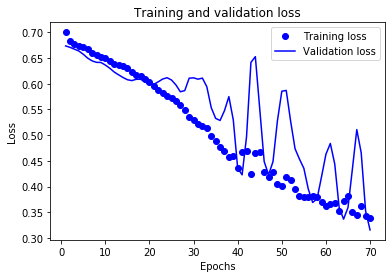

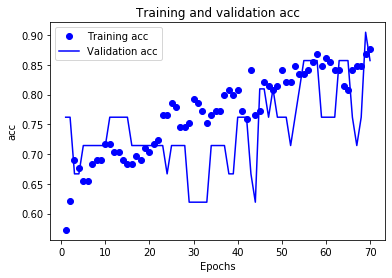

Test loss : 44.6882426738739 %
Test accuracy : 73.8095223903656 %


In [15]:
batch_size = 128 # 512 #256  #128
epochs = 70 # 230
drop_ratio = 0.002 #0.02 #0.03 #0.04 # 0.03  #0.001
training_Validation(batch_size,epochs,drop_ratio)

# training on (k-fold on,training & Validation)

In [16]:
# split in training 80%, test 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

def kfold_training_Validation(batch_size,epochs,drop_ratio,split):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_shape=(60,)),
        tf.keras.layers.Dropout(drop_ratio),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    from sklearn.model_selection import KFold
    kf = KFold(n_splits=split)
    kf.get_n_splits()
    
    # K-fold not using correctly
    
    for train_index, test_index in kf.split(x_train):
        x_train1, x_test1 = x_train[train_index], x_train[test_index]
        y_train1, y_test1 = y_train[train_index], y_train[test_index] 

    history = model.fit(x_train1, y_train1,batch_size=batch_size,epochs=epochs,verbose=1)
    
    
    evaluation = model.evaluate(x_test1,  y_test1,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

In [17]:
# Training and Validation (K-Fold)
batch_size = 128 #512  #128 # 32 , 128 , 256
epochs = 130
drop_ratio = 0.001 # 0.001    # 0.001, 0.9, 0.75, 0.75, 0.5, 0.5, 0.5
split = 6
kfold_training_Validation(batch_size,epochs,drop_ratio,split)

batch_size : 128 
 epochs : 130 
 drop_ratio : 0.001
Train on 139 samples
Epoch 1/130
139/139 [==============================] - 1s 6ms/sample - loss: 0.7030 - accuracy: 0.5036
Epoch 2/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6621 - accuracy: 0.6331
Epoch 3/130
139/139 [==============================] - 0s 65us/sample - loss: 0.6631 - accuracy: 0.5827
Epoch 4/130
139/139 [==============================] - 0s 65us/sample - loss: 0.6572 - accuracy: 0.5899
Epoch 5/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6443 - accuracy: 0.6187
Epoch 6/130
139/139 [==============================] - 0s 86us/sample - loss: 0.6279 - accuracy: 0.6475
Epoch 7/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6134 - accuracy: 0.6691
Epoch 8/130
139/139 [==============================] - 0s 86us/sample - loss: 0.6050 - accuracy: 0.7122
Epoch 9/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6061 - accuracy

139/139 [==============================] - 0s 65us/sample - loss: 0.3379 - accuracy: 0.8561
Epoch 78/130
139/139 [==============================] - 0s 86us/sample - loss: 0.3386 - accuracy: 0.8273
Epoch 79/130
139/139 [==============================] - 0s 79us/sample - loss: 0.3295 - accuracy: 0.8633
Epoch 80/130
139/139 [==============================] - 0s 65us/sample - loss: 0.3219 - accuracy: 0.8777
Epoch 81/130
139/139 [==============================] - ETA: 0s - loss: 0.3243 - accuracy: 0.88 - 0s 72us/sample - loss: 0.3182 - accuracy: 0.8849
Epoch 82/130
139/139 [==============================] - 0s 79us/sample - loss: 0.3197 - accuracy: 0.8777
Epoch 83/130
139/139 [==============================] - 0s 72us/sample - loss: 0.3195 - accuracy: 0.8705
Epoch 84/130
139/139 [==============================] - 0s 65us/sample - loss: 0.3195 - accuracy: 0.8345
Epoch 85/130
139/139 [==============================] - 0s 79us/sample - loss: 0.3105 - accuracy: 0.8993
Epoch 86/130
139/139 [====

# Normalizing Features & One hot encoding on Labels

In [18]:
print(variety)

[[0.0368 0.0403 0.0317 ... 0.0067 0.0078 0.0068]
 [0.0388 0.0324 0.0688 ... 0.0068 0.0097 0.0067]
 [0.0079 0.0086 0.0055 ... 0.0058 0.0059 0.0032]
 ...
 [0.0162 0.0041 0.0239 ... 0.0036 0.0053 0.003 ]
 [0.0261 0.0266 0.0223 ... 0.0021 0.0028 0.0023]
 [0.01   0.0171 0.0623 ... 0.0044 0.004  0.0117]]


In [19]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
variety = scale.fit_transform(variety)
print(type(variety))
print(variety.shape)
print()
print(variety)

<class 'numpy.ndarray'>
(208, 60)

[[ 0.33293501  0.05667358 -0.31647355 ... -0.19352127 -0.0229216
   0.05833677]
 [ 0.42013576 -0.18358965  0.65129467 ... -0.17802765  0.28519456
   0.03841223]
 [-0.92711593 -0.90742066 -0.99991095 ... -0.33296385 -0.33103776
  -0.65894689]
 ...
 [-0.56523279 -1.04427947 -0.51993965 ... -0.6738235  -0.4283376
  -0.69879598]
 [-0.13358904 -0.35998544 -0.56167628 ... -0.9062278  -0.83375359
  -0.8382678 ]
 [-0.83555514 -0.64890959  0.48173959 ... -0.54987454 -0.63915392
   1.03463953]]


In [20]:
print(label)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.]


In [21]:
# one hot encoding
label = tf.keras.utils.to_categorical(label)
print(label)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

In [22]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)
# 
#x_train, x_val, y_train, y_val = train_test_split(variety, label, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)

print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)
print("validation :",x_val.shape)
print("validation label :",y_val.shape)

train : (145, 60)
train label : (145, 2)
test : (42, 60)
test label: (42, 2)
validation : (21, 60)
validation label : (21, 2)


In [23]:
#  training on (training & Validation)

def training_Validation(batch_size,epochs,drop_ratio):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='categorical_crossentropy', # sparse_categorical_crossentropy
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Predictoin
    #prediction = model.predict_classes(x_test)[0]
    #print(prediction)
    #print(y_test[0])
    
    #return model

batch_size : 128 
 epochs : 35 
 drop_ratio : 0.001
Train on 145 samples, validate on 21 samples
Epoch 1/35
145/145 [==============================] - 2s 11ms/sample - loss: 0.7540 - accuracy: 0.6690 - val_loss: 0.4414 - val_accuracy: 0.8095
Epoch 2/35
145/145 [==============================] - 0s 324us/sample - loss: 0.4802 - accuracy: 0.7862 - val_loss: 0.4205 - val_accuracy: 0.7619
Epoch 3/35
145/145 [==============================] - 0s 407us/sample - loss: 0.3675 - accuracy: 0.8276 - val_loss: 0.4055 - val_accuracy: 0.8095
Epoch 4/35
145/145 [==============================] - 0s 407us/sample - loss: 0.2963 - accuracy: 0.8828 - val_loss: 0.3939 - val_accuracy: 0.8095
Epoch 5/35
145/145 [==============================] - 0s 379us/sample - loss: 0.2568 - accuracy: 0.9172 - val_loss: 0.3863 - val_accuracy: 0.8571
Epoch 6/35
145/145 [==============================] - 0s 379us/sample - loss: 0.2233 - accuracy: 0.9517 - val_loss: 0.3840 - val_accuracy: 0.8571
Epoch 7/35
145/145 [========

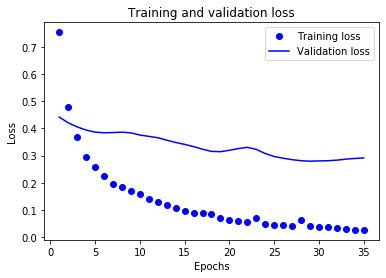

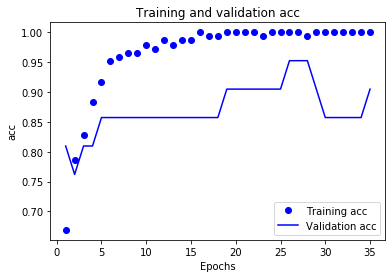

Test loss : 37.9696398973465 %
Test accuracy : 78.57142686843872 %


In [24]:
batch_size =  128   # 512 #256  #128
epochs = 35 # 60 # 230
drop_ratio = 0.001 #0.02 #0.03 #0.04 # 0.03  #0.001
training_Validation(batch_size,epochs,drop_ratio)

# K-Fold

In [25]:
# split in training 80%, test 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

def kfold_training_Validation(batch_size,epochs,drop_ratio,split):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio)
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='categorical_crossentropy', # sparse_categorical_crossentropy
              metrics=['accuracy'])
           
    k = split
    num_val_samples = len(x_train) // 4
    num_epochs = 100
    all_scores = []
    all_mae_histories = []

    for i in range(k):
        print('processing fold # ', i)
        # prepare the validation data: data from partition # k
        val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  
        # prepare the training data: data from data - k
        partial_train_data = np.concatenate(                    
        [x_train[:i * num_val_samples],
        x_train[(i + 1 ) * num_val_samples:]],
        axis = 0)
        partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1 ) * num_val_samples:]],
        axis = 0)
        
        history = model.fit(partial_train_data, partial_train_targets,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(val_data,  val_targets,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

    #Predictoin
    a = 41
    prediction = model.predict_classes(x_test)[a]
    print("Predicted value :",prediction)
    #print(y_test[a])
    
    from numpy import argmax
    print("actual value :",argmax(tf.keras.utils.to_categorical(prediction, a)))

In [26]:
# Training and Validation (K-Fold)
batch_size = 128 
epochs = 40
drop_ratio = 0.001 
split = 4
kfold_training_Validation(batch_size,epochs,drop_ratio,split)

batch_size : 128 
 epochs : 40 
 drop_ratio : 0.001
processing fold #  0
Train on 125 samples, validate on 21 samples
Epoch 1/40
125/125 [==============================] - 1s 12ms/sample - loss: 1.2171 - accuracy: 0.4720 - val_loss: 0.6235 - val_accuracy: 0.5714
Epoch 2/40
125/125 [==============================] - 0s 312us/sample - loss: 0.9131 - accuracy: 0.5520 - val_loss: 0.5669 - val_accuracy: 0.6667
Epoch 3/40
125/125 [==============================] - 0s 416us/sample - loss: 0.7211 - accuracy: 0.6320 - val_loss: 0.5175 - val_accuracy: 0.7619
Epoch 4/40
125/125 [==============================] - 0s 440us/sample - loss: 0.5898 - accuracy: 0.7040 - val_loss: 0.4767 - val_accuracy: 0.8095
Epoch 5/40
125/125 [==============================] - 0s 496us/sample - loss: 0.4986 - accuracy: 0.7600 - val_loss: 0.4438 - val_accuracy: 0.8095
Epoch 6/40
125/125 [==============================] - 0s 456us/sample - loss: 0.4252 - accuracy: 0.8000 - val_loss: 0.4183 - val_accuracy: 0.8571
Epoch 7

Epoch 16/40
125/125 [==============================] - 0s 328us/sample - loss: 0.0363 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 0.9524
Epoch 17/40
125/125 [==============================] - 0s 336us/sample - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.1435 - val_accuracy: 0.9524
Epoch 18/40
125/125 [==============================] - 0s 344us/sample - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9524
Epoch 19/40
125/125 [==============================] - 0s 336us/sample - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.1392 - val_accuracy: 0.9524
Epoch 20/40
125/125 [==============================] - 0s 328us/sample - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.1370 - val_accuracy: 0.9524
Epoch 21/40
125/125 [==============================] - 0s 336us/sample - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.1349 - val_accuracy: 0.9524
Epoch 22/40
125/125 [==============================] - 0s 352us/sample - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0

Epoch 32/40
125/125 [==============================] - 0s 448us/sample - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 1.0000
Epoch 33/40
125/125 [==============================] - 0s 424us/sample - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 34/40
125/125 [==============================] - 0s 520us/sample - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 1.0000
Epoch 35/40
125/125 [==============================] - 0s 456us/sample - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 36/40
125/125 [==============================] - 0s 320us/sample - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 37/40
125/125 [==============================] - 0s 456us/sample - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 1.0000
Epoch 38/40
125/125 [==============================] - 0s 496us/sample - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0

In [27]:
############################################################################

In [28]:
# FInal model

In [29]:
# split in training 80%, test 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

In [30]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(128, input_shape=(60,)),
tf.keras.layers.Dropout(drop_ratio),
tf.keras.layers.Dense(60, activation='relu'),
tf.keras.layers.Dense(30, activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
])

In [31]:
model.compile(optimizer='adam',# adam # RMSprop
            loss='categorical_crossentropy', # sparse_categorical_crossentropy
            metrics=['accuracy'])

In [32]:
batch_size = 128 
epochs = 40
drop_ratio = 0.001 
split = 4

k = split
num_val_samples = len(x_train) // 4
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
    print('processing fold # ', i)
    # prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  
    # prepare the training data: data from data - k
    partial_train_data = np.concatenate(                    
    [x_train[:i * num_val_samples],
    x_train[(i + 1 ) * num_val_samples:]],
    axis = 0)
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1 ) * num_val_samples:]],
    axis = 0)
        
    history = model.fit(partial_train_data, partial_train_targets,
                        batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))


processing fold #  0
Train on 125 samples, validate on 21 samples
Epoch 1/40
125/125 [==============================] - 1s 11ms/sample - loss: 0.8348 - accuracy: 0.5440 - val_loss: 0.5957 - val_accuracy: 0.7143
Epoch 2/40
125/125 [==============================] - 0s 304us/sample - loss: 0.6135 - accuracy: 0.6880 - val_loss: 0.5395 - val_accuracy: 0.7143
Epoch 3/40
125/125 [==============================] - 0s 416us/sample - loss: 0.4783 - accuracy: 0.8320 - val_loss: 0.4953 - val_accuracy: 0.7143
Epoch 4/40
125/125 [==============================] - 0s 424us/sample - loss: 0.3905 - accuracy: 0.8400 - val_loss: 0.4580 - val_accuracy: 0.7143
Epoch 5/40
125/125 [==============================] - 0s 448us/sample - loss: 0.3327 - accuracy: 0.8720 - val_loss: 0.4257 - val_accuracy: 0.7619
Epoch 6/40
125/125 [==============================] - 0s 456us/sample - loss: 0.2838 - accuracy: 0.9040 - val_loss: 0.3981 - val_accuracy: 0.8095
Epoch 7/40
125/125 [==============================] - 0s 41

Epoch 16/40
125/125 [==============================] - 0s 448us/sample - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 1.0000
Epoch 17/40
125/125 [==============================] - 0s 432us/sample - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 1.0000
Epoch 18/40
125/125 [==============================] - 0s 488us/sample - loss: 0.0281 - accuracy: 1.0000 - val_loss: 0.0905 - val_accuracy: 1.0000
Epoch 19/40
125/125 [==============================] - 0s 496us/sample - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.0883 - val_accuracy: 1.0000
Epoch 20/40
125/125 [==============================] - 0s 488us/sample - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 1.0000
Epoch 21/40
125/125 [==============================] - 0s 416us/sample - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 22/40
125/125 [==============================] - 0s 376us/sample - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0

Epoch 32/40
125/125 [==============================] - 0s 472us/sample - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 33/40
125/125 [==============================] - 0s 480us/sample - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 34/40
125/125 [==============================] - 0s 440us/sample - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 35/40
125/125 [==============================] - 0s 472us/sample - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 36/40
125/125 [==============================] - 0s 368us/sample - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 37/40
125/125 [==============================] - 0s 400us/sample - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 38/40
125/125 [==============================] - 0s 416us/sample - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0

In [33]:
evaluation = model.evaluate(val_data,  val_targets,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

41/1 - 0s - loss: 0.0217 - accuracy: 1.0000

Test loss : 2.166237309575081 %
Test accuracy : 100.0 %


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

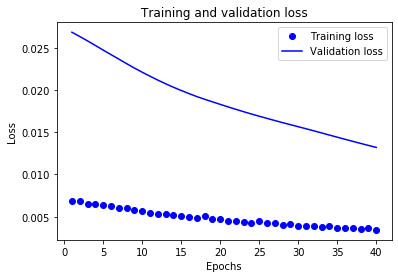

In [35]:
#Plotting the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

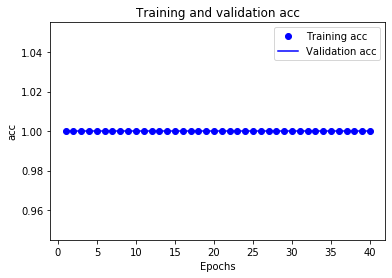

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


In [37]:
#Predictoin
a = 41
prediction = model.predict_classes(x_test)[a]
print("Predicted value :",prediction)
#print(y_test[a])
    
from numpy import argmax
print("actual value :",argmax(tf.keras.utils.to_categorical(prediction, a)))

Predicted value : 0
actual value : 0
